<a href="https://colab.research.google.com/github/nt189/Valores-Atipicos/blob/main/Actividad%204.2%20(Valores%20At%C3%ADpicos)/Actividad_4_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# Carga del dataframe Mexico
# df= pd.read_csv('df_clean_Mexico.csv')
df = pd.read_csv('df_clean_LA_California.csv')

In [129]:
# Vemos la informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45533 entries, 0 to 45532
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          45532 non-null  object 
 1   description                                   45533 non-null  object 
 2   neighborhood_overview                         45533 non-null  object 
 3   host_name                                     45531 non-null  object 
 4   host_location                                 45533 non-null  object 
 5   host_response_time                            45533 non-null  object 
 6   host_response_rate                            45533 non-null  float64
 7   host_acceptance_rate                          45533 non-null  float64
 8   host_is_superhost                             45533 non-null  object 
 9   host_neighbourhood                            45533 non-null 

In [130]:
# Verificacion de nulos
df.isnull().sum()

,0
name,1
description,0
neighborhood_overview,0
host_name,2
host_location,0
host_response_time,0
host_response_rate,0
host_acceptance_rate,0
host_is_superhost,0
host_neighbourhood,0


# **Inicio de tratamiento para valores atipicos**

In [131]:
# Creo 2 dataframe para poder procesar los outliers
cuantitativas = df.select_dtypes(include=[np.number])
cualitativas = df.select_dtypes(include=['object', 'category'])

In [132]:
print(len(cuantitativas.columns))
cuantitativas

29


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,0.96,0.41,173.0,194.0,34.049660,-118.435550,6,3.0,3.0,399.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,61,4,57
1,1.00,1.00,1.0,1.0,34.048410,-118.387510,2,2.0,3.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1,1,0
2,0.60,0.17,4.0,5.0,34.070583,-118.390742,6,3.0,3.0,434.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,4,4,0
3,0.20,0.56,15.0,25.0,34.109329,-118.073098,2,1.0,1.0,49.0,...,3.00,5.00,5.00,5.00,5.00,5.00,3.00,4,1,3
4,1.00,0.95,3.0,5.0,34.015590,-118.494080,2,0.0,1.0,231.0,...,4.93,4.95,4.98,4.93,5.00,4.73,4.77,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,1.00,1.00,1.0,1.0,33.976649,-118.457536,2,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1,1,0
45529,1.00,1.00,1.0,1.0,34.049102,-118.247411,3,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1,1,0
45530,1.00,1.00,3.0,3.0,33.788520,-118.171780,5,2.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,3,0,3
45531,1.00,1.00,2.0,5.0,34.027010,-118.326880,2,0.0,1.0,116.0,...,4.84,4.91,4.73,4.92,4.94,4.78,4.75,1,1,0


In [133]:
print(len(cualitativas.columns))
cualitativas

21


,name,description,neighborhood_overview,host_name,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_identity_verified,...,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,first_review,last_review,instant_bookable
0,Westwood lovely three bedrooms three bathrooms,The whole group will enjoy easy access to ever...,Sin descripción,Moon,"Los Angeles, CA",within a few hours,f,Brentwood,"['email', 'phone']",t,...,West Los Angeles,City of Los Angeles,Entire condo,Entire home/apt,3 baths,"[""Dedicated workspace"", ""Air conditioning"", ""K...",t,Sin fecha,Sin fecha,f
1,Spanish style lower duplex near Beverly Hills,Sin descripción,Sin descripción,Ida,Mexico,within a day,f,South Robertson,"['email', 'phone']",f,...,Beverlywood,City of Los Angeles,Entire rental unit,Entire home/apt,2 baths,"[""Air conditioning"", ""Pets allowed"", ""Hot wate...",f,Sin fecha,Sin fecha,f
2,Charming Beverly Hills Home,"Charming, renovated home in the Beverly Hills ...",Sin descripción,Tiana,Mexico,within a day,f,Sin especificar,"['email', 'phone']",t,...,Beverly Hills,Other Cities,Entire home,Entire home/apt,3 baths,"[""Air conditioning"", ""Kitchen"", ""Carbon monoxi...",t,Sin fecha,Sin fecha,f
3,Tianpu's warm room with bathroom,Relax in this unique and serene retreat.,Sin descripción,Dan,Mexico,a few days or more,f,Walnut Valley,['phone'],t,...,Temple City,Other Cities,Private room in home,Private room,1 private bath,"[""Dedicated workspace"", ""Air conditioning"", ""K...",t,2023-03-27,2023-03-27,f
4,"Santa Monica apt, free parking, steps to the b...",Welcome to our stunning apartment nestled in t...,Sin descripción,Farkhat,Mexico,within an hour,t,Downtown,['phone'],t,...,Santa Monica,Other Cities,Entire rental unit,Entire home/apt,1 bath,"[""Clothing storage: closet"", ""Shared beach acc...",t,2023-08-16,2024-07-21,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,"Cozy 1 Bed, 2 Bath apartment",Sin descripción,Sin descripción,Eric,"San Francisco, CA",within an hour,f,Sin especificar,"['email', 'phone']",t,...,Marina del Rey,Unincorporated Areas,Entire rental unit,Entire home/apt,2 baths,"[""Pool"", ""Air conditioning"", ""Fire pit"", ""Kitc...",f,Sin fecha,Sin fecha,f
45529,DTLA Loft | Industrial | Central,You'll have a great time at this comfortable p...,Sin descripción,Michael,Mexico,within an hour,f,Downtown Los Angeles,['phone'],t,...,Downtown,City of Los Angeles,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Air conditioning"", ""Heating""]",t,Sin fecha,Sin fecha,f
45530,"Long Beach, Rustic Suite 3 Beds, 1 Bath, 2 Rooms",Enjoy easy access to popular shops and restaur...,Sin descripción,Cabana,Mexico,within an hour,f,Whittier,"['email', 'phone']",t,...,Long Beach,Other Cities,Room in boutique hotel,Private room,1 private bath,"[""Air conditioning"", ""TV"", ""Free parking on pr...",t,Sin fecha,Sin fecha,t
45531,Charming Craftsman Bungalow w/ Outdoor Sauna,Peaceful private studio in lovely Jefferson Pa...,Jefferson Park is a historical neighborhood wi...,Christine,"Los Angeles, CA",within an hour,t,Sin especificar,"['email', 'phone', 'work_email']",t,...,Jefferson Park,City of Los Angeles,Entire home,Entire home/apt,1 bath,"[""Free street parking"", ""Kitchen"", ""Room-darke...",t,2019-03-28,2024-09-02,t


# **Diagramas de caja o bigote**

<Figure size 1500x800 with 0 Axes>

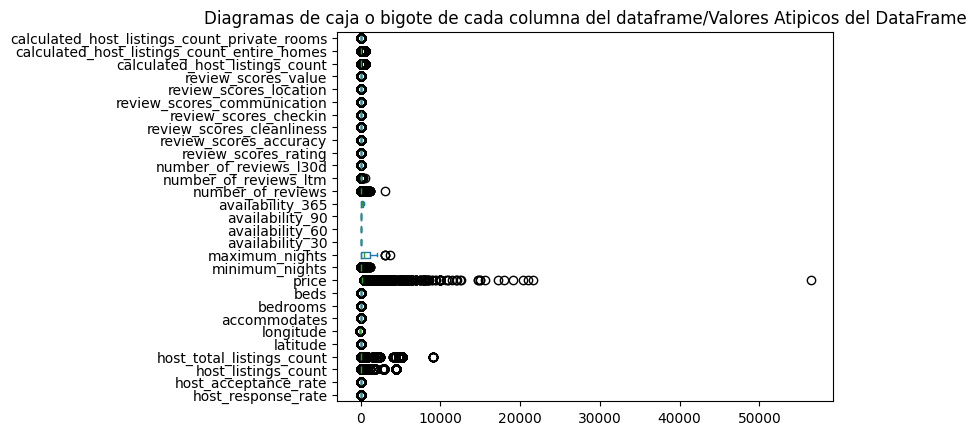

In [134]:
# Realizamos diagramas de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de cada columna del dataframe/Valores Atipicos del DataFrame')
plt.show()

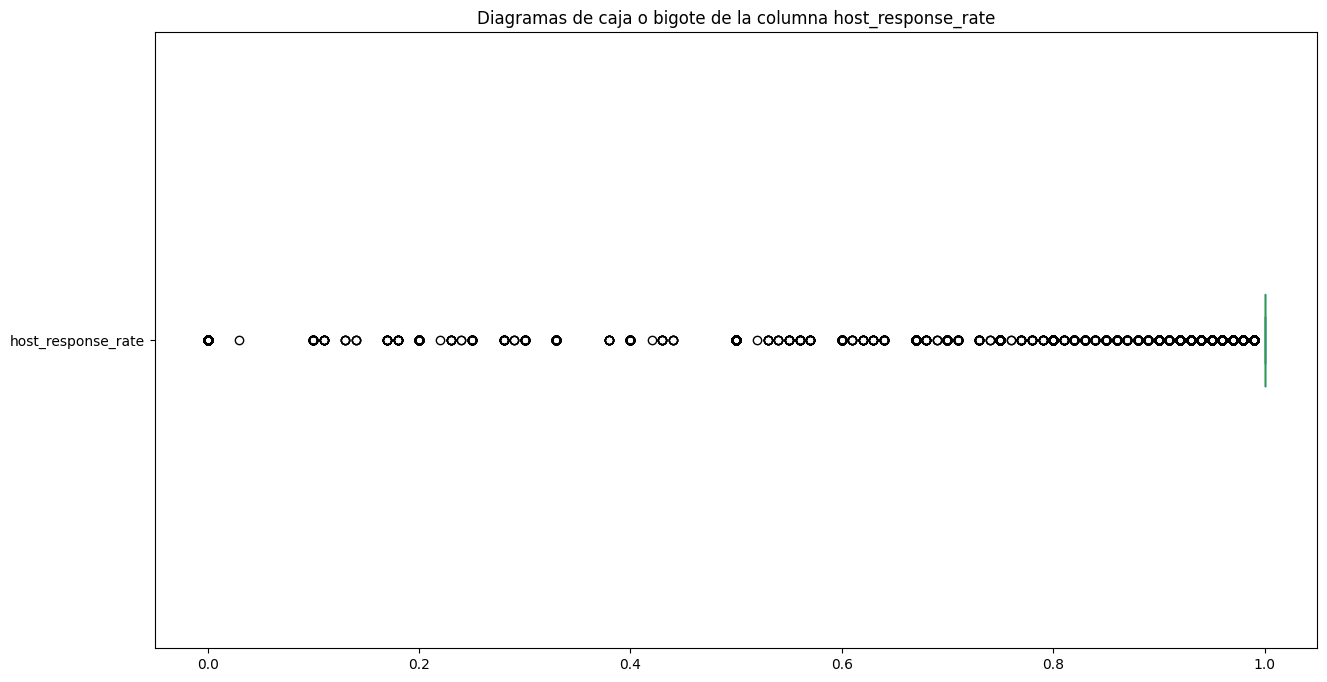

In [135]:
# Realizamos diagramas de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas['host_response_rate'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna host_response_rate')
plt.show()

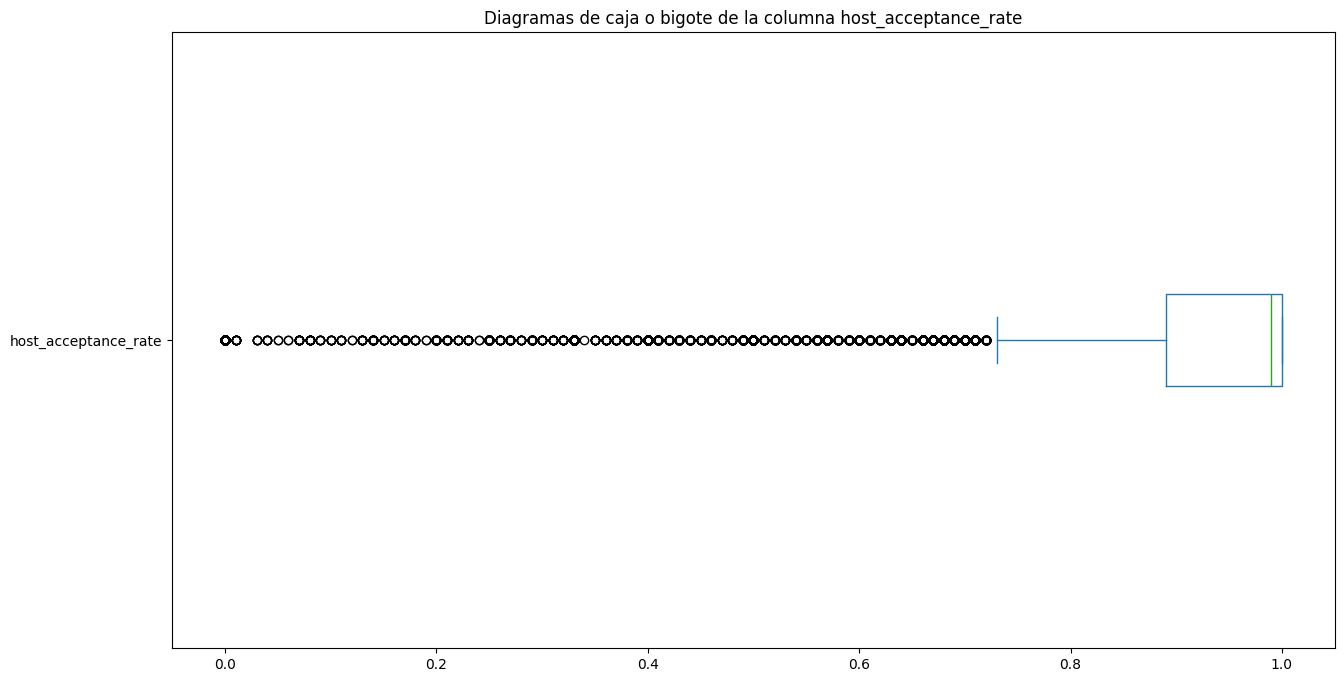

In [136]:
plt.figure(figsize=(15, 8))
cuantitativas['host_acceptance_rate'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna host_acceptance_rate')
plt.show()

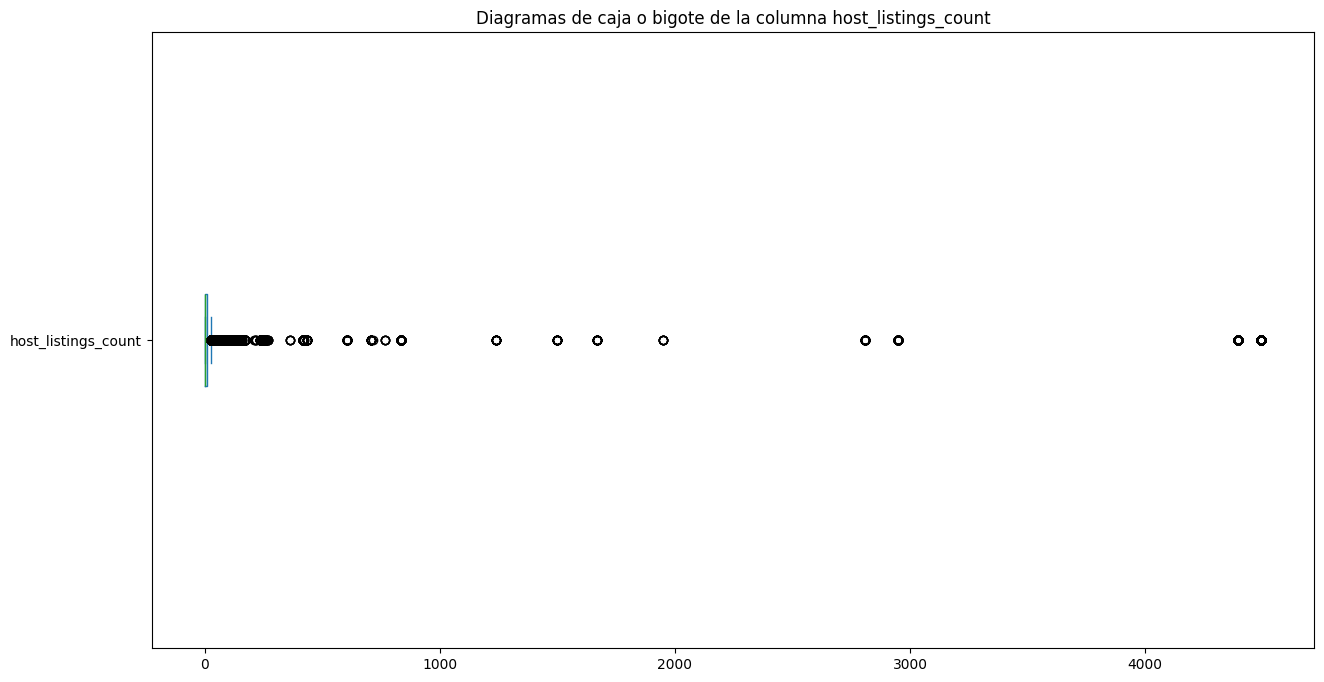

In [137]:
plt.figure(figsize=(15, 8))
cuantitativas['host_listings_count'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna host_listings_count')
plt.show()

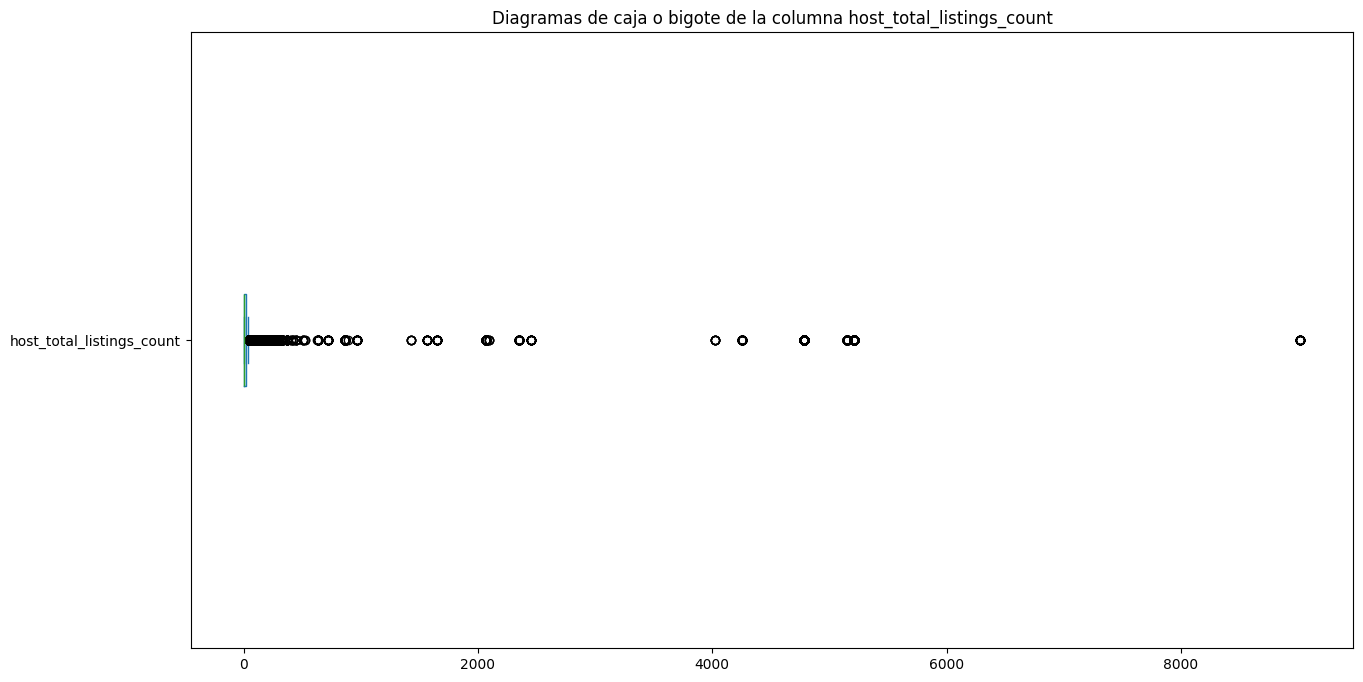

In [138]:
plt.figure(figsize=(15, 8))
cuantitativas['host_total_listings_count'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna host_total_listings_count')
plt.show()

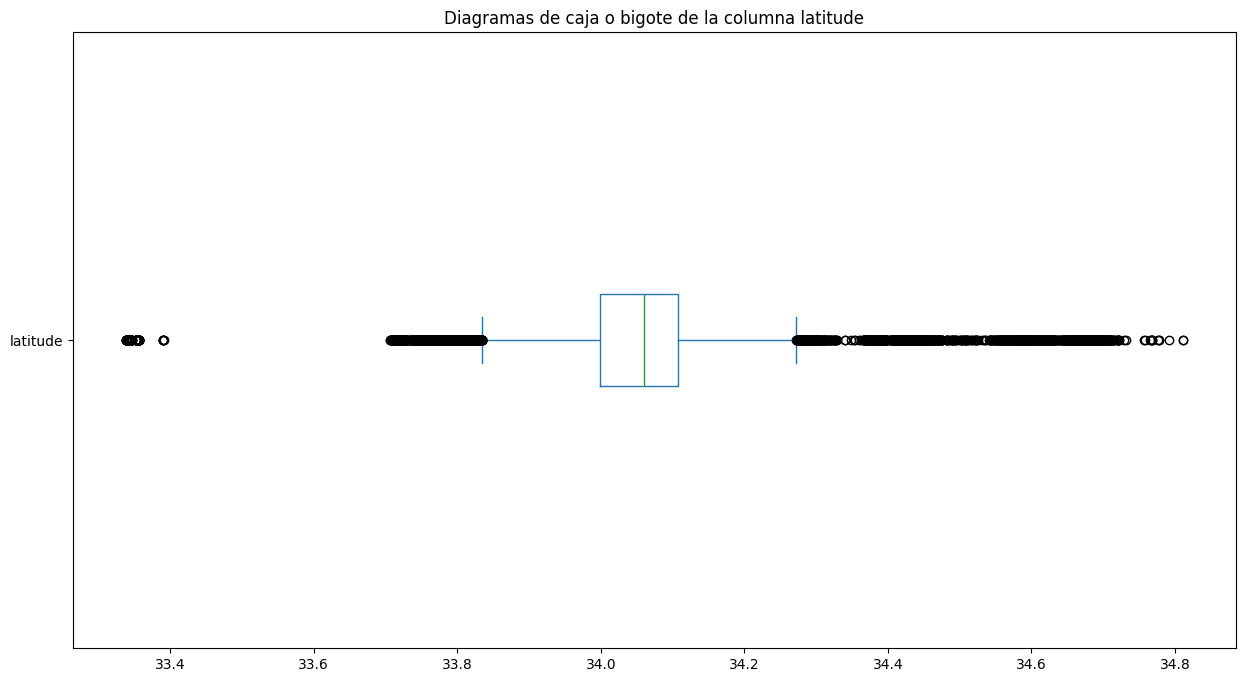

In [139]:
plt.figure(figsize=(15, 8))
cuantitativas['latitude'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna latitude')
plt.show()

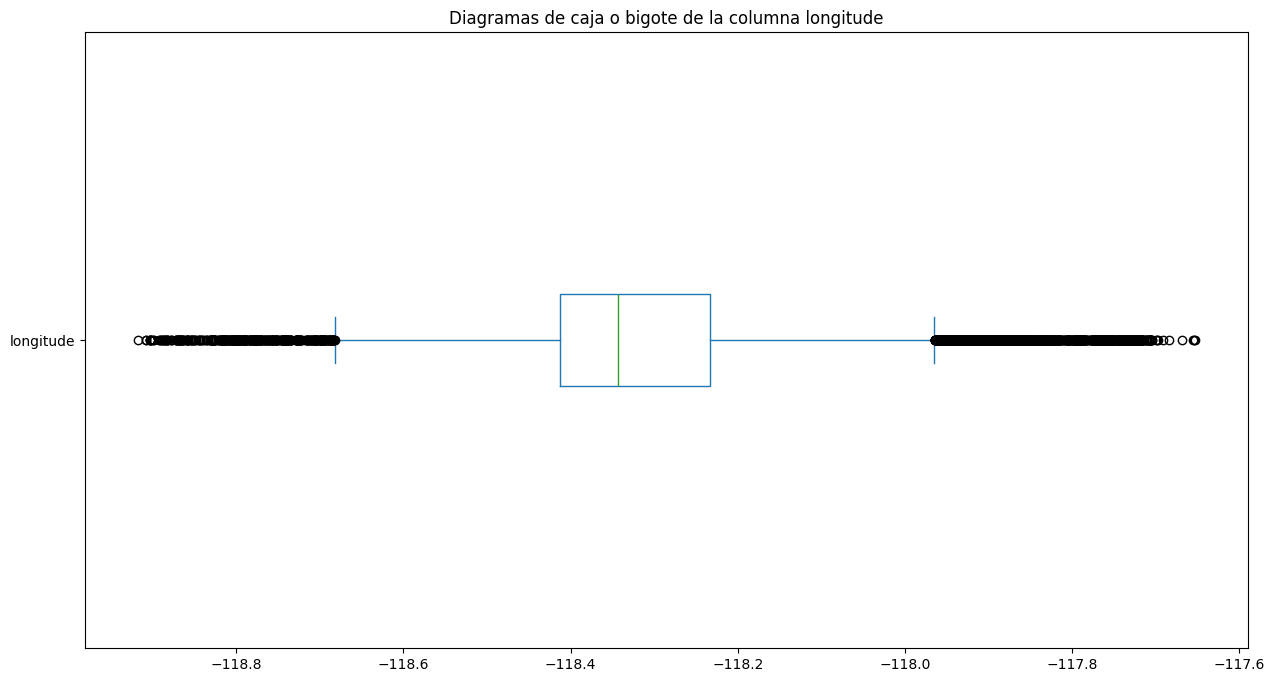

In [140]:
plt.figure(figsize=(15, 8))
cuantitativas['longitude'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna longitude')
plt.show()

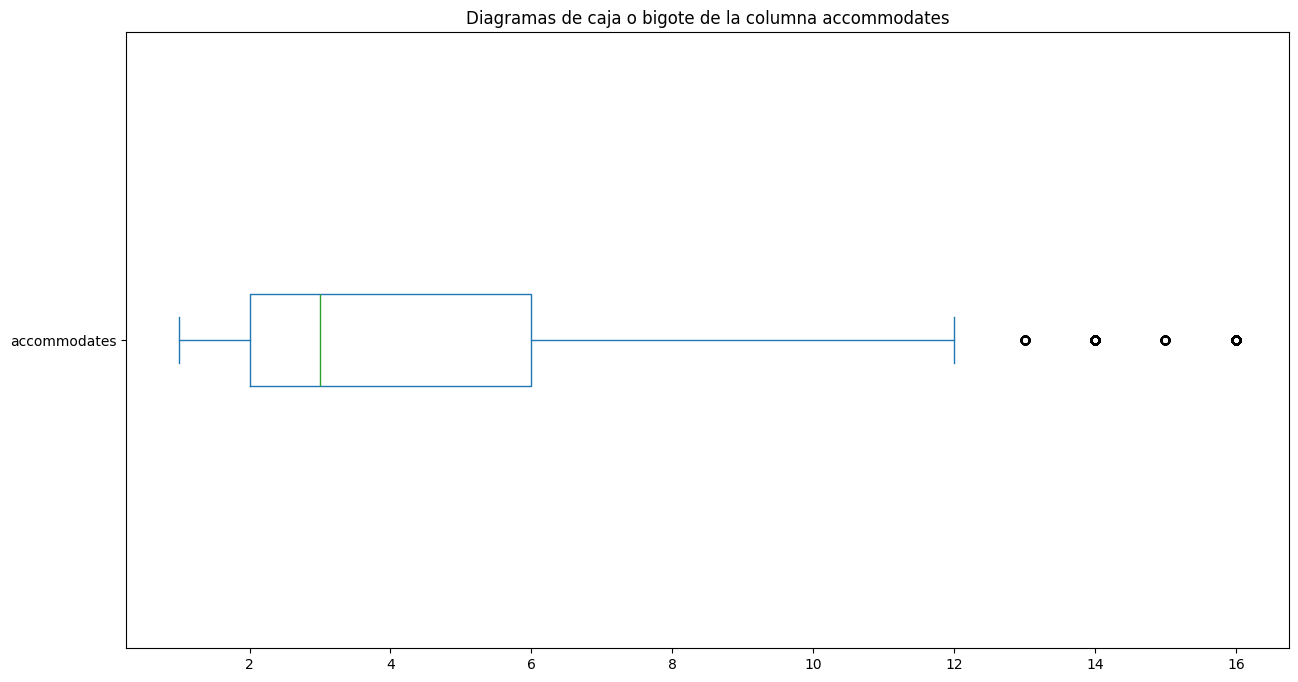

In [141]:
plt.figure(figsize=(15, 8))
cuantitativas['accommodates'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna accommodates')
plt.show()

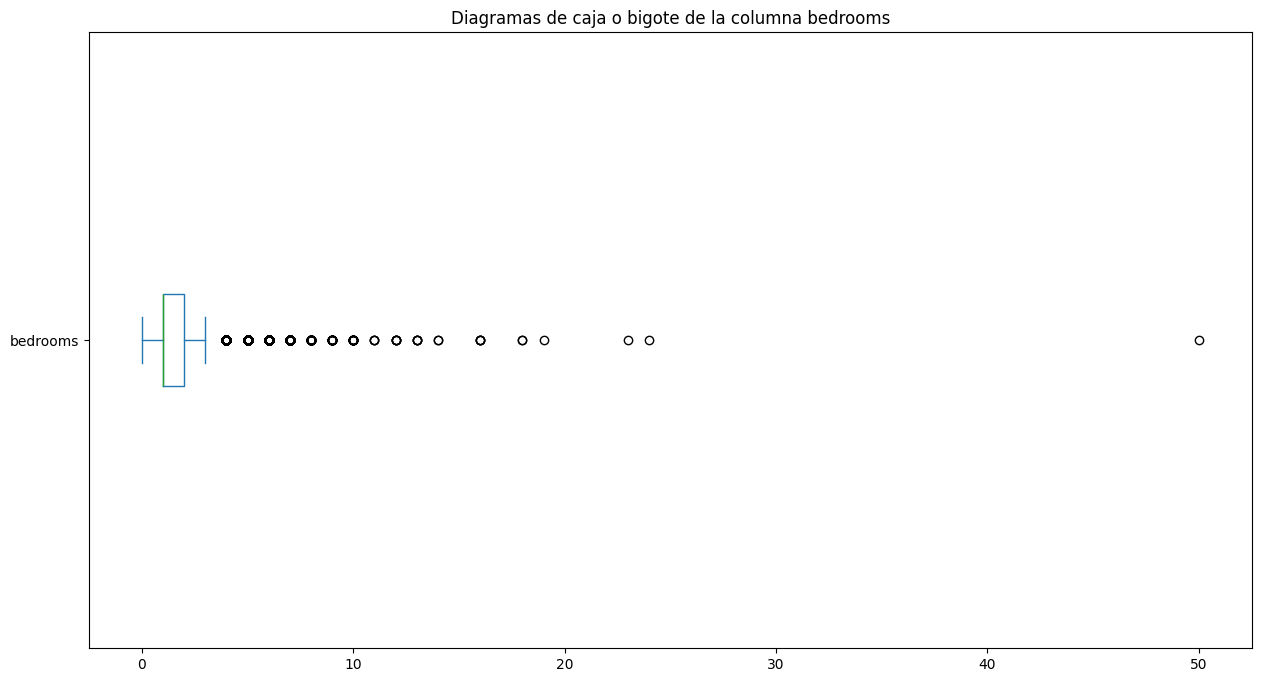

In [142]:
plt.figure(figsize=(15, 8))
cuantitativas['bedrooms'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna bedrooms')
plt.show()

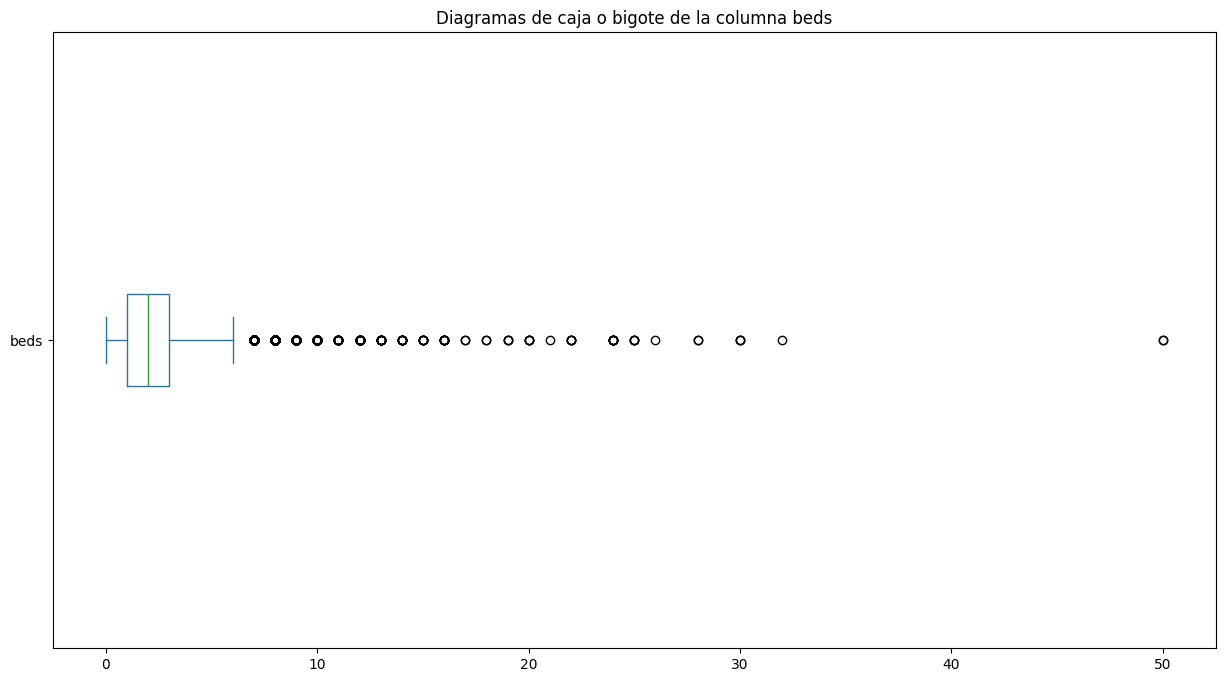

In [143]:
plt.figure(figsize=(15, 8))
cuantitativas['beds'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna beds')
plt.show()

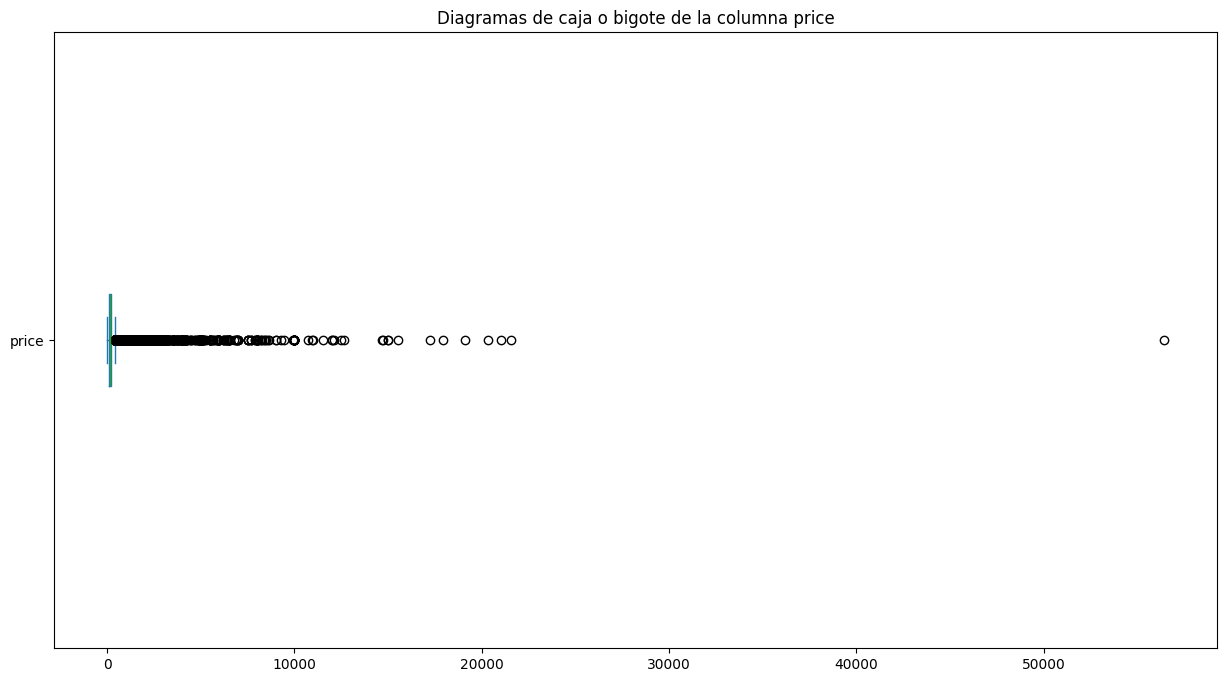

In [144]:
plt.figure(figsize=(15, 8))
cuantitativas['price'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna price')
plt.show()

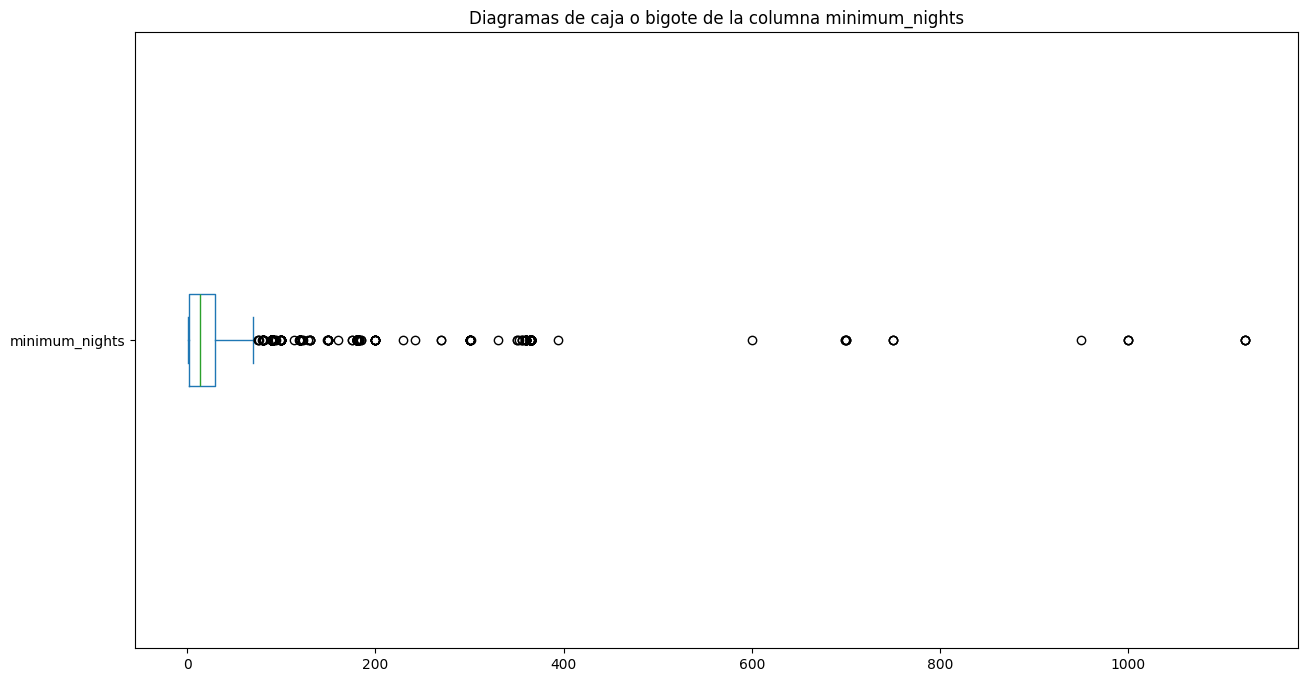

In [145]:
plt.figure(figsize=(15, 8))
cuantitativas['minimum_nights'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna minimum_nights')
plt.show()

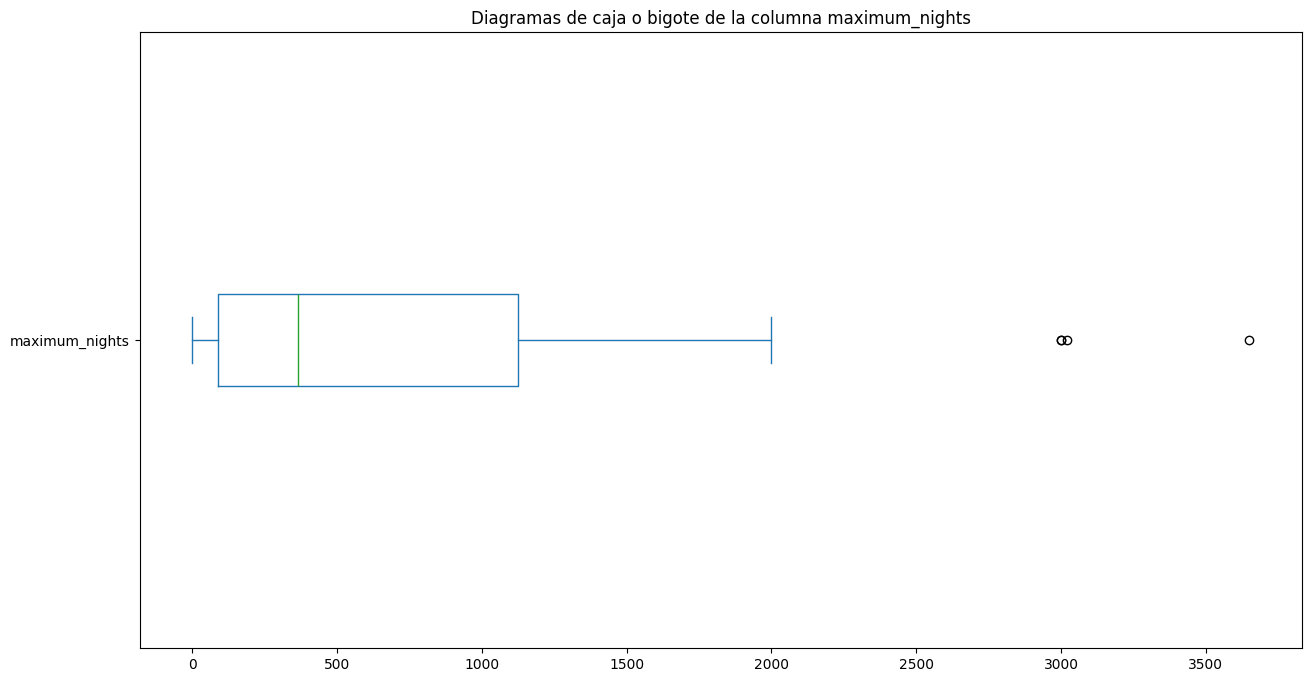

In [146]:
plt.figure(figsize=(15, 8))
cuantitativas['maximum_nights'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna maximum_nights')
plt.show()

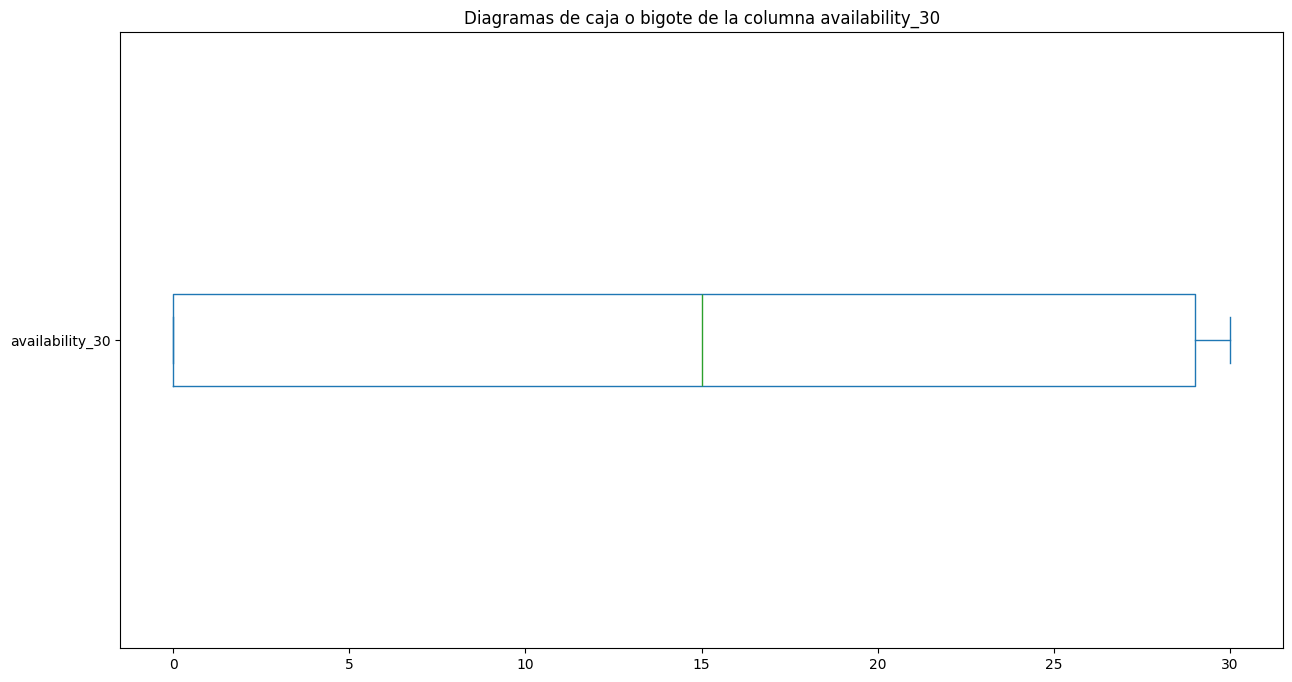

In [147]:
plt.figure(figsize=(15, 8))
cuantitativas['availability_30'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna availability_30')
plt.show()

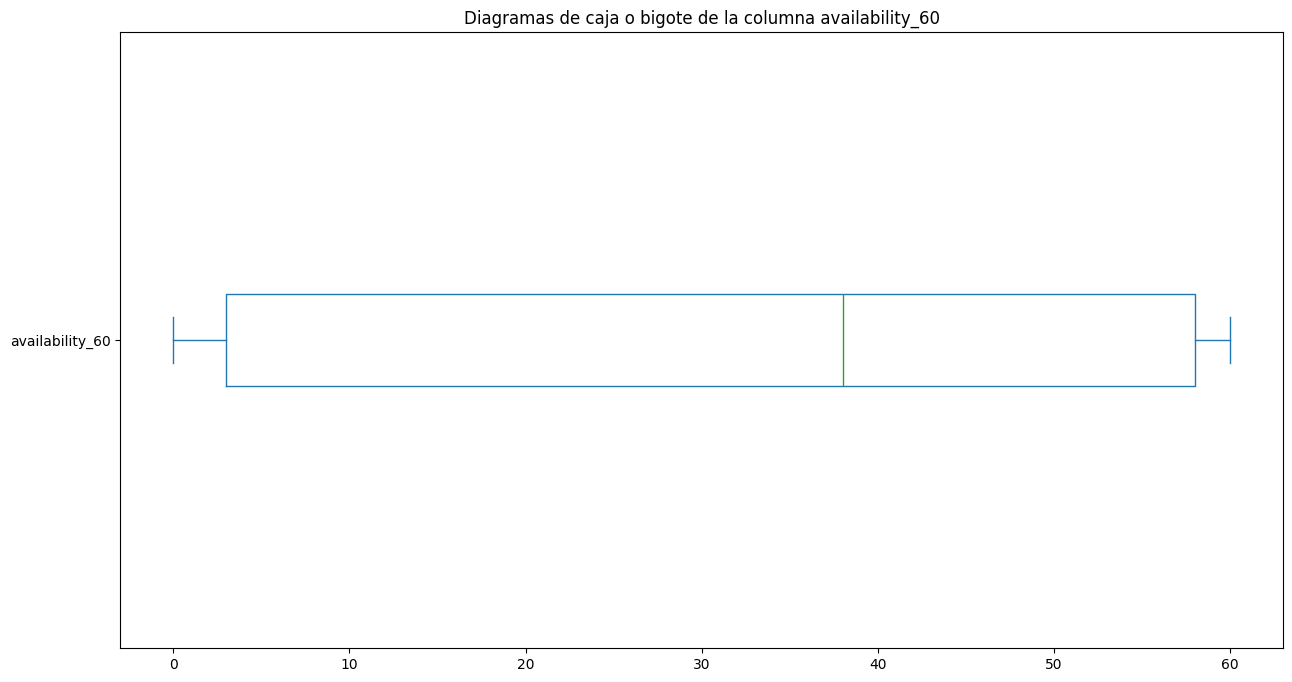

In [148]:
plt.figure(figsize=(15, 8))
cuantitativas['availability_60'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna availability_60')
plt.show()

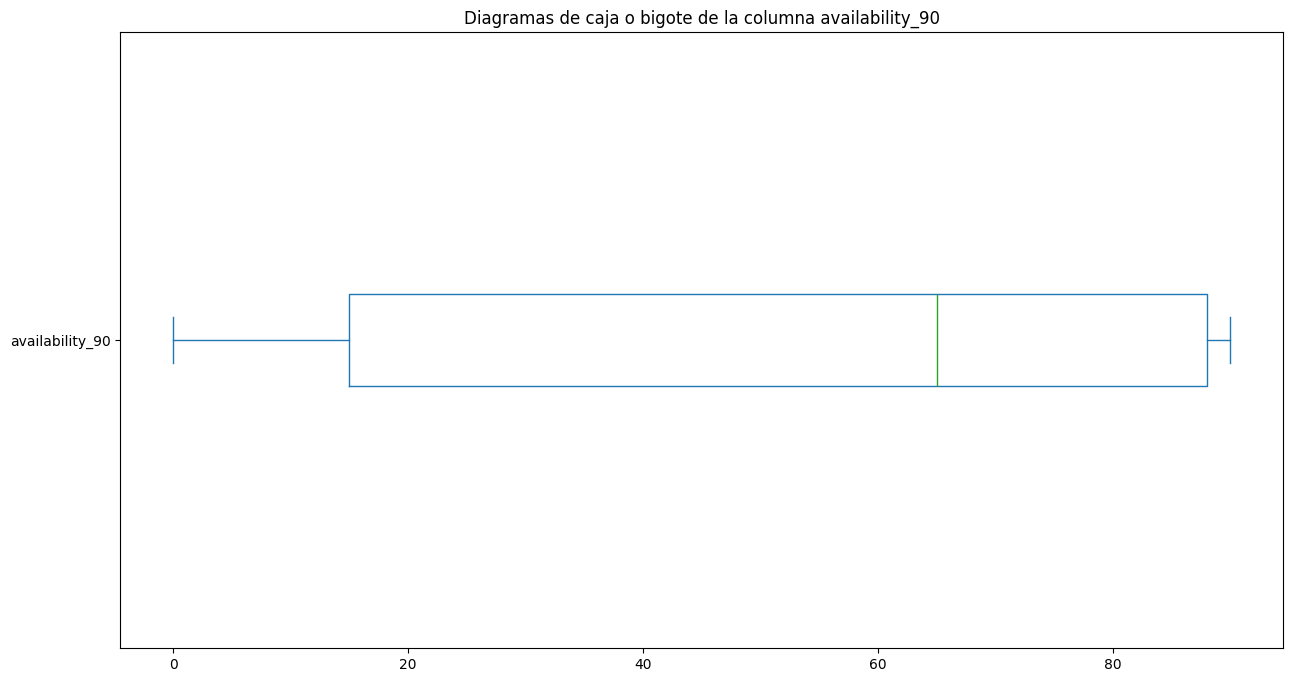

In [149]:
plt.figure(figsize=(15, 8))
cuantitativas['availability_90'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna availability_90')
plt.show()

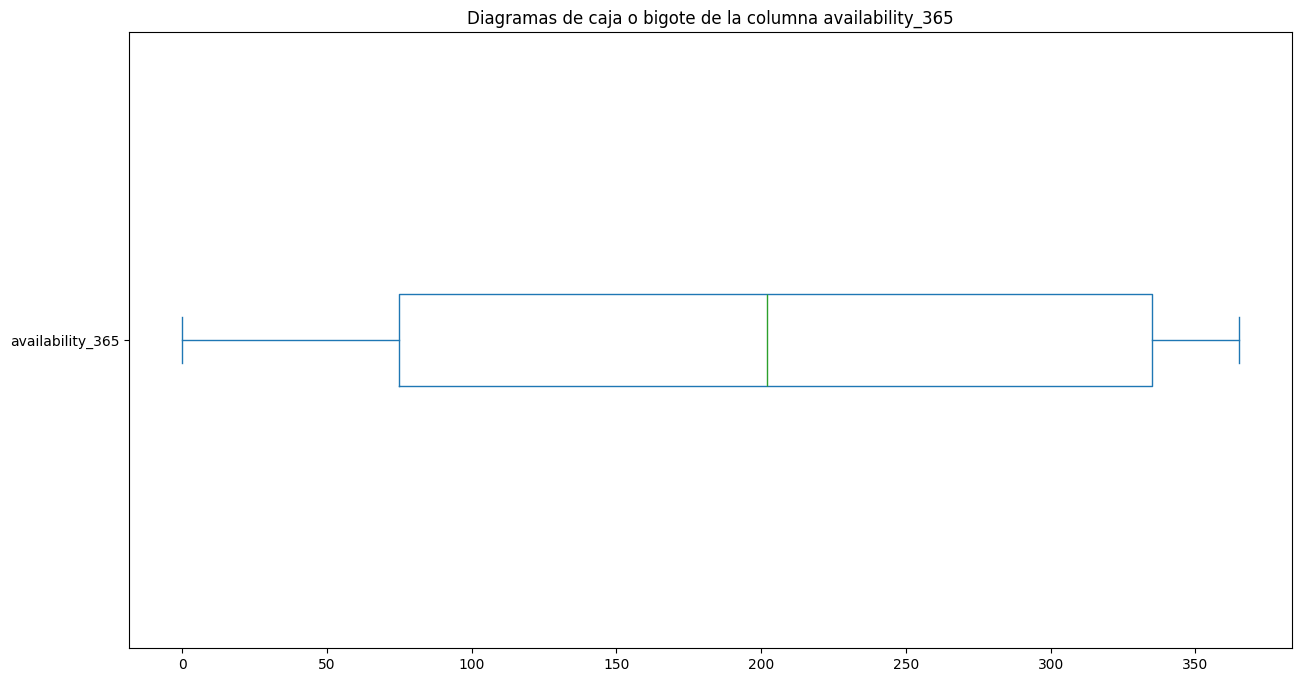

In [150]:
plt.figure(figsize=(15, 8))
cuantitativas['availability_365'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna availability_365')
plt.show()

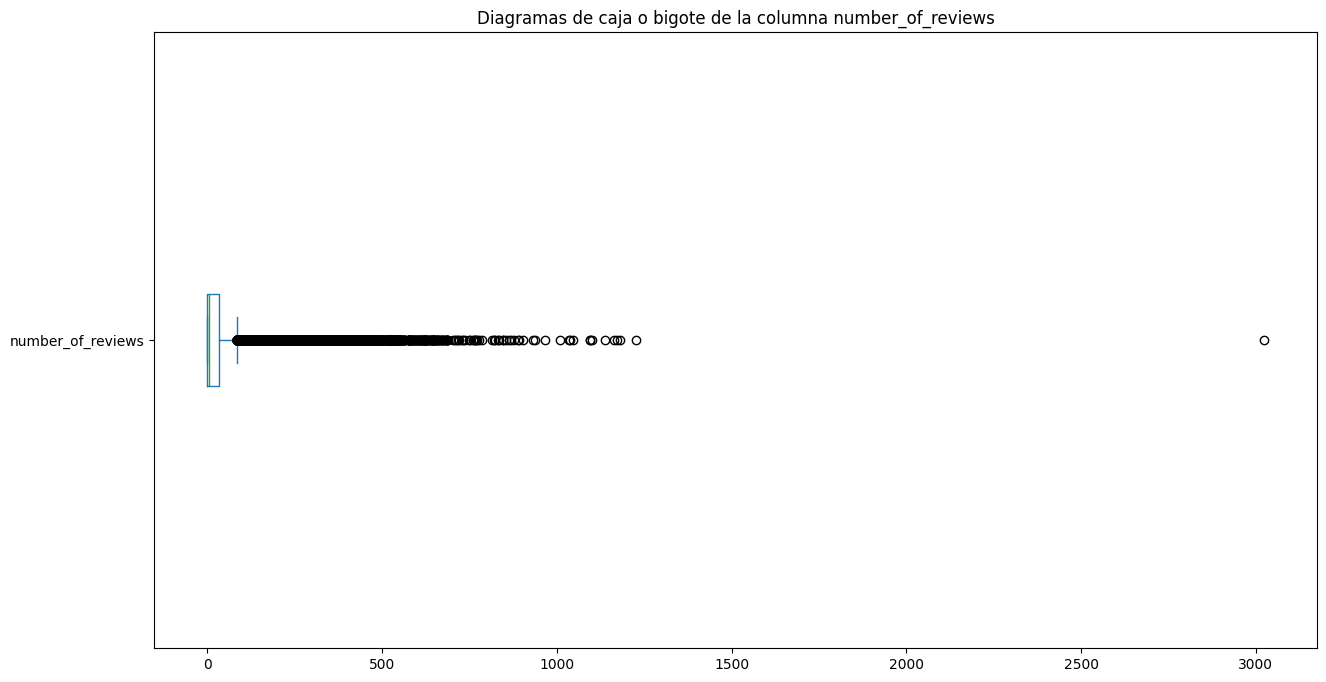

In [151]:
plt.figure(figsize=(15, 8))
cuantitativas['number_of_reviews'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna number_of_reviews')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

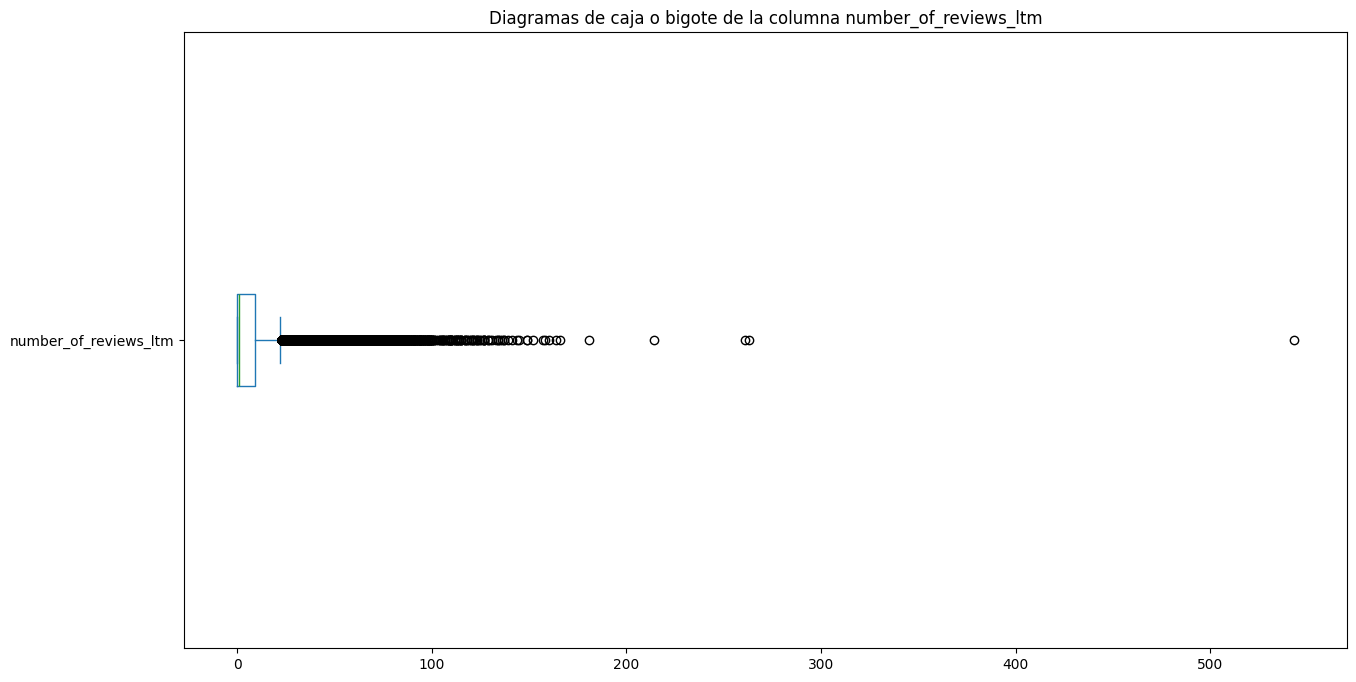

In [152]:
plt.figure(figsize=(15, 8))
cuantitativas['number_of_reviews_ltm'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna number_of_reviews_ltm')
plt

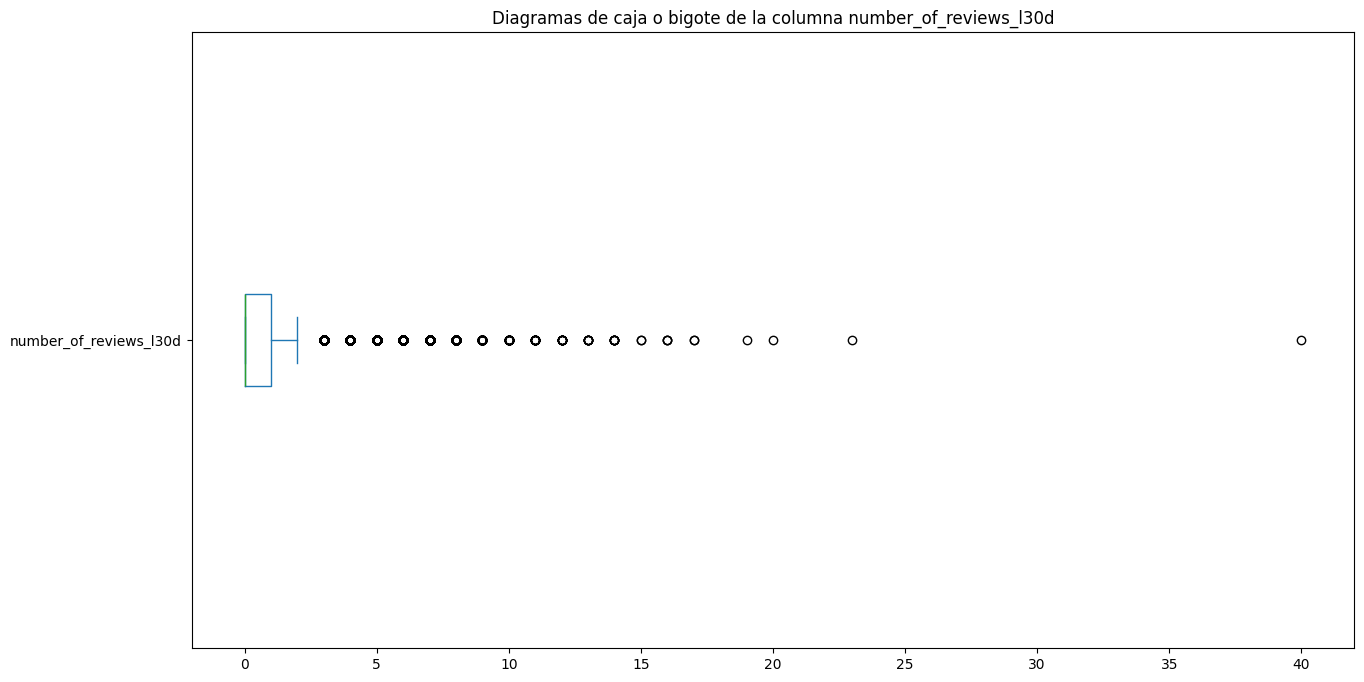

In [153]:
plt.figure(figsize=(15, 8))
cuantitativas['number_of_reviews_l30d'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna number_of_reviews_l30d')
plt.show()

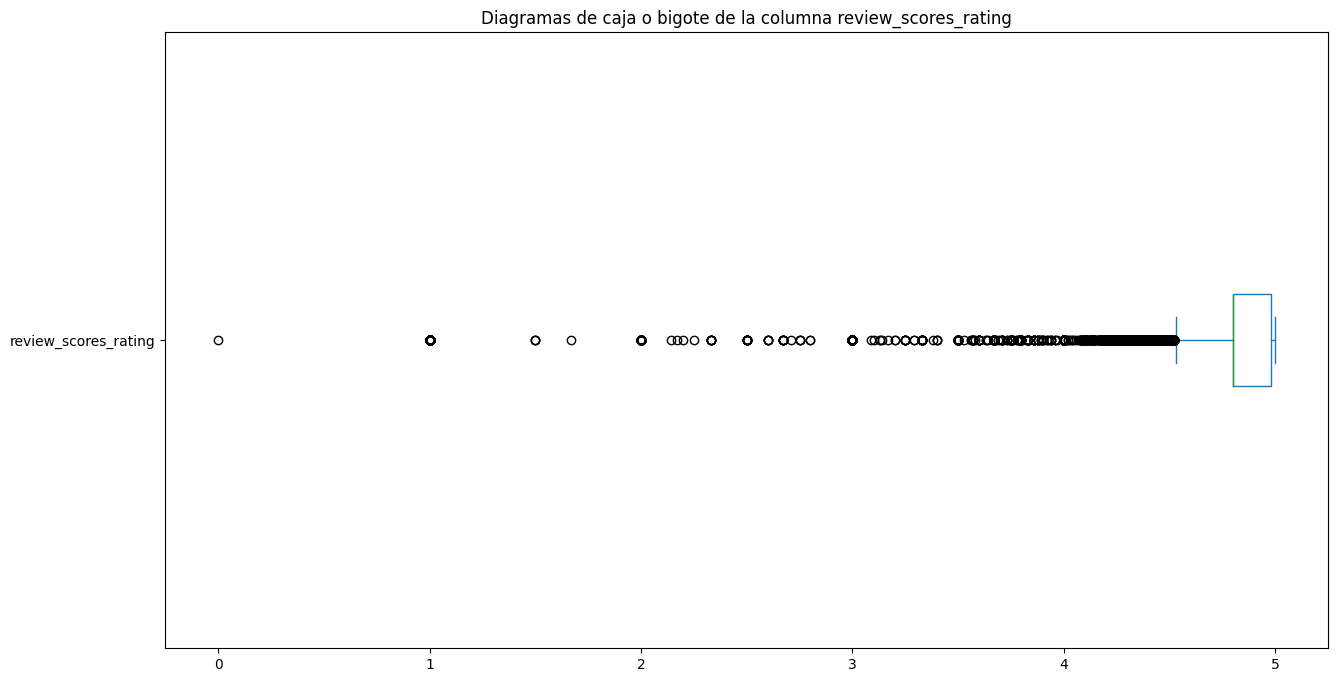

In [154]:
plt.figure(figsize=(15, 8))
cuantitativas['review_scores_rating'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna review_scores_rating')
plt.show()

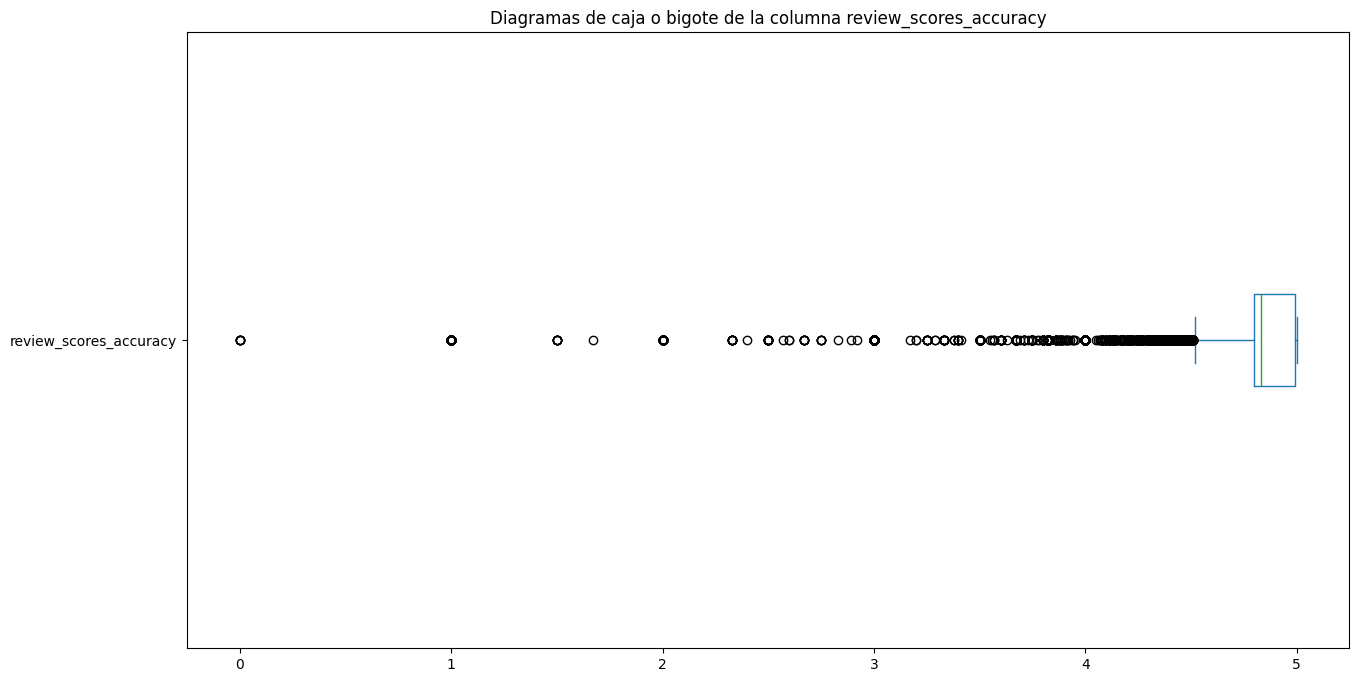

In [155]:
plt.figure(figsize=(15, 8))
cuantitativas['review_scores_accuracy'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna review_scores_accuracy')
plt.show()

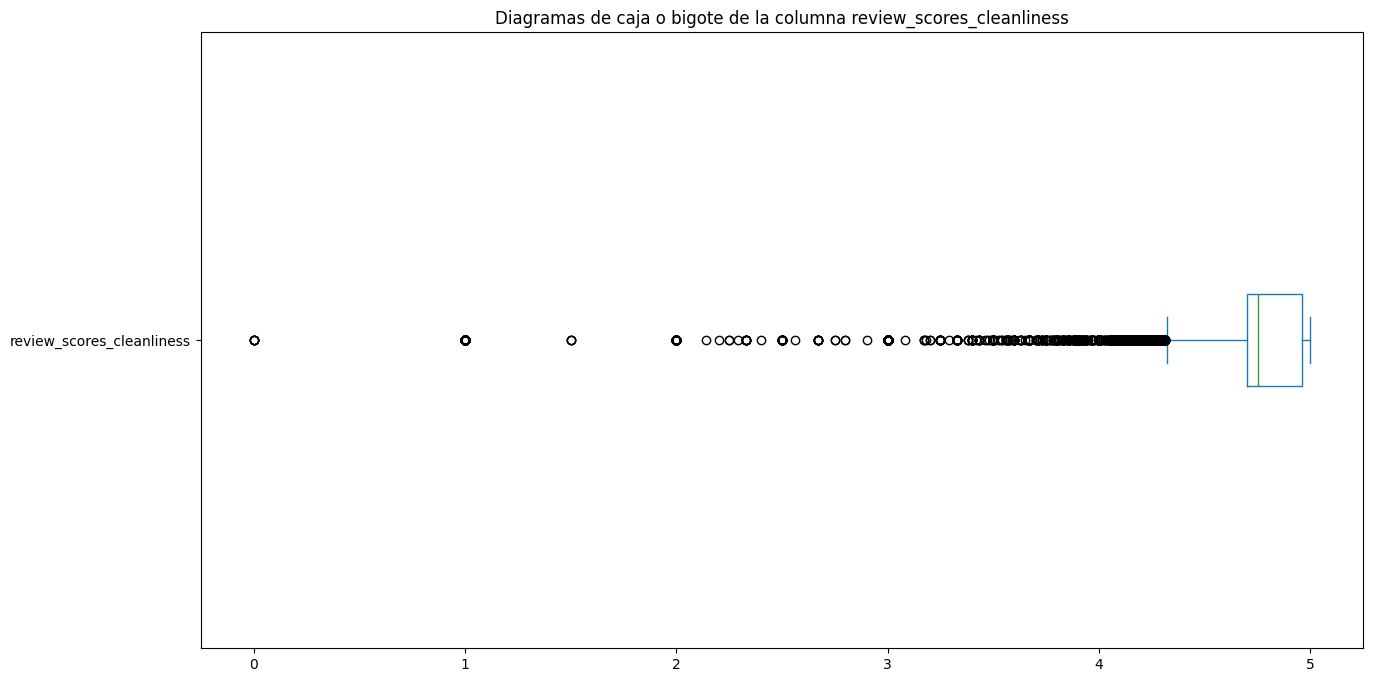

In [156]:
plt.figure(figsize=(15, 8))
cuantitativas['review_scores_cleanliness'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna review_scores_cleanliness')
plt.show()

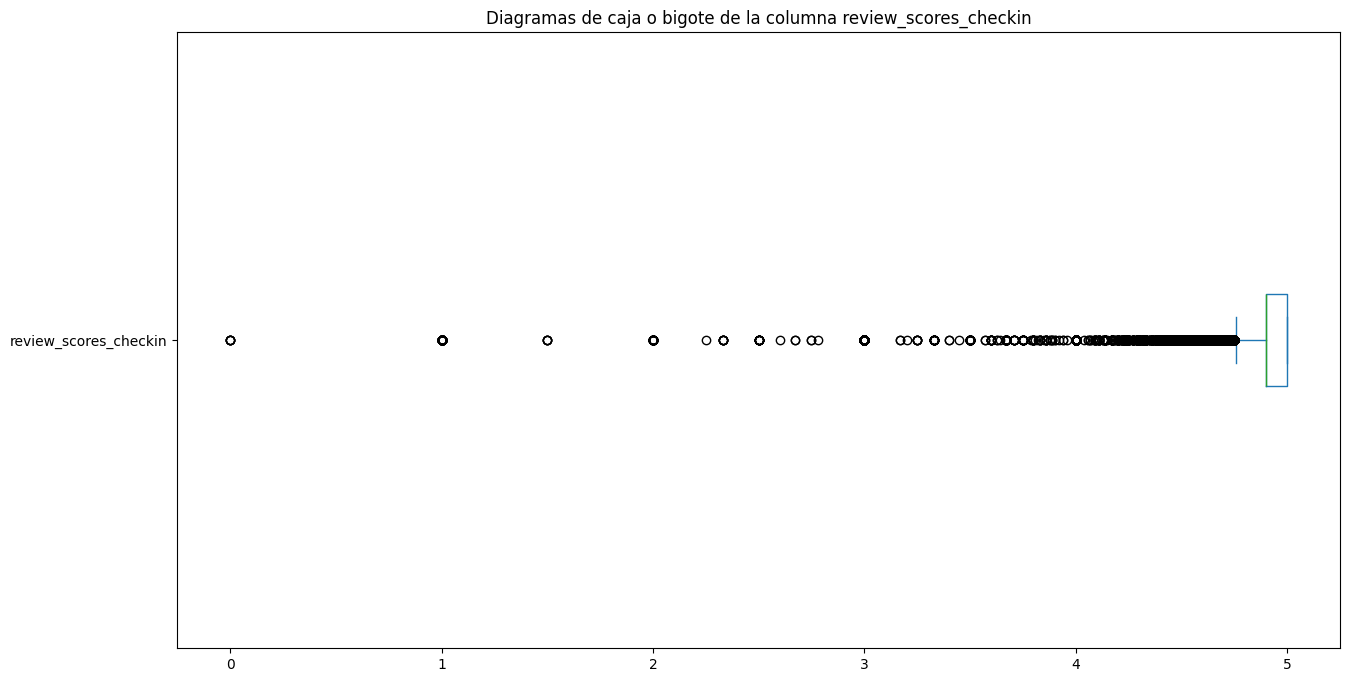

In [157]:
plt.figure(figsize=(15, 8))
cuantitativas['review_scores_checkin'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna review_scores_checkin')
plt.show()

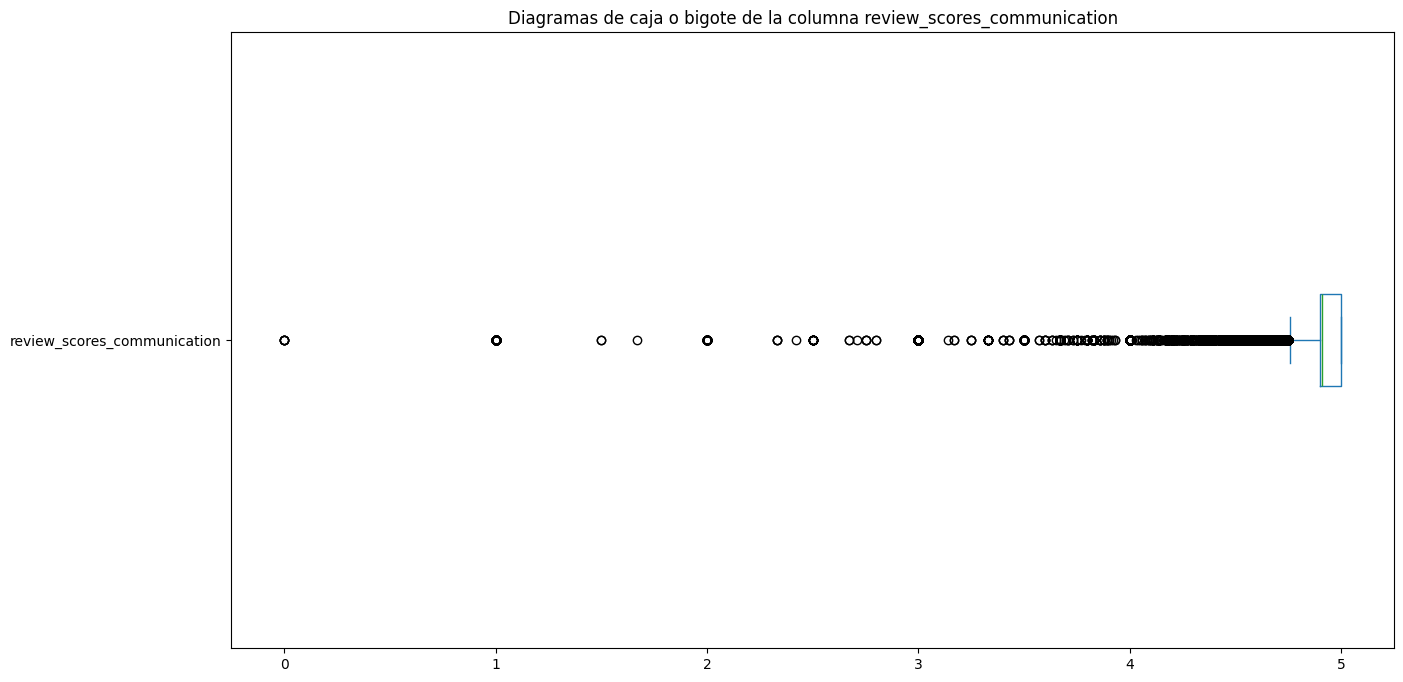

In [158]:
plt.figure(figsize=(15, 8))
cuantitativas['review_scores_communication'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna review_scores_communication')
plt.show()

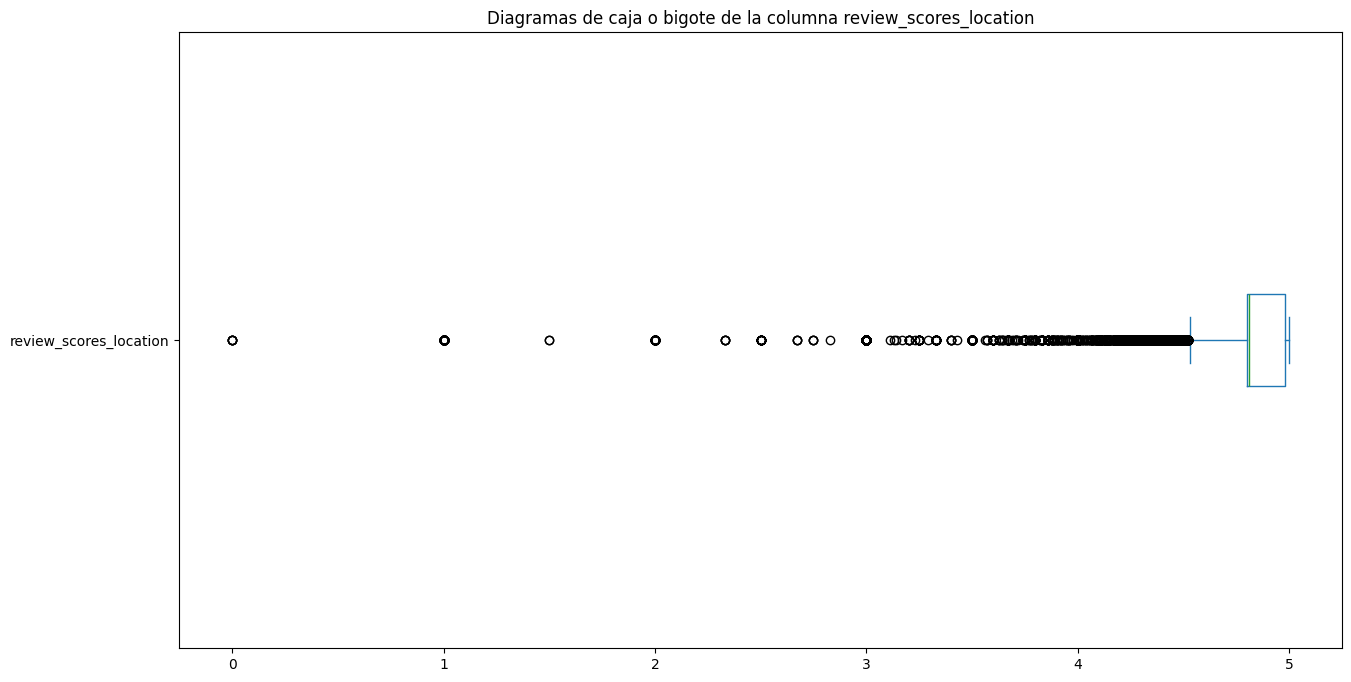

In [159]:
plt.figure(figsize=(15, 8))
cuantitativas['review_scores_location'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna review_scores_location')
plt.show()

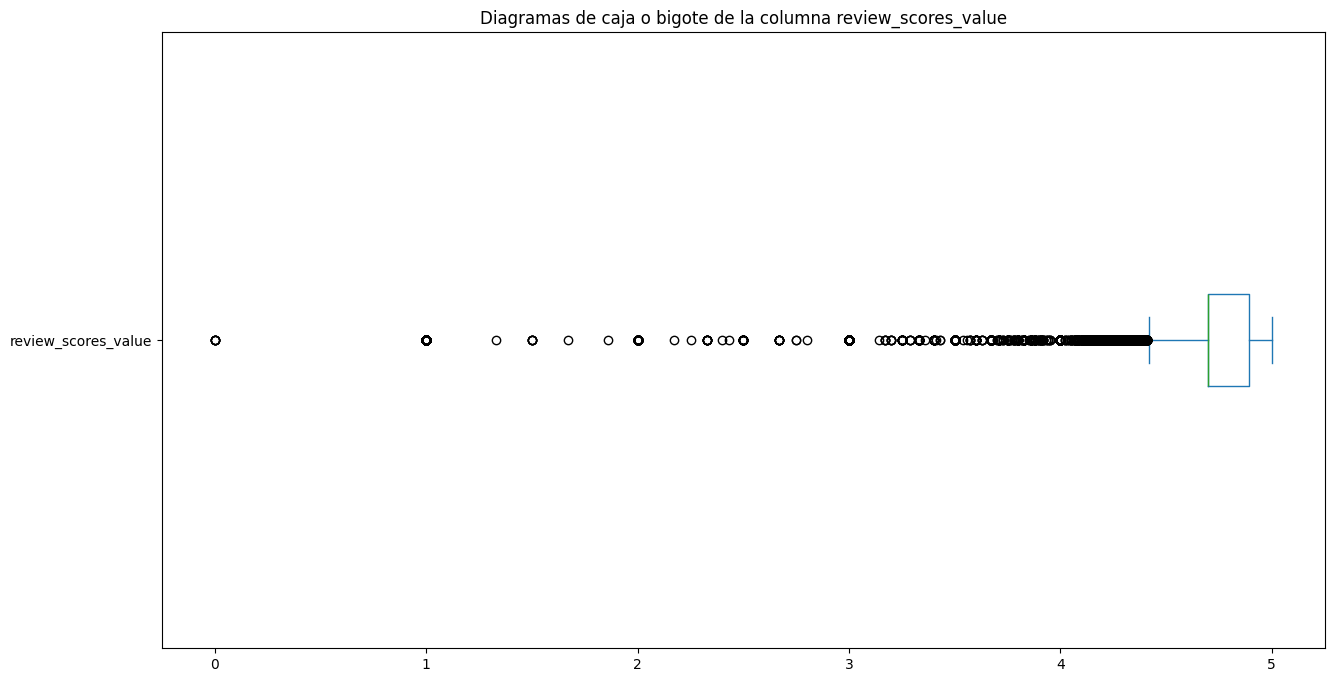

In [160]:
plt.figure(figsize=(15, 8))
cuantitativas['review_scores_value'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna review_scores_value')
plt.show()

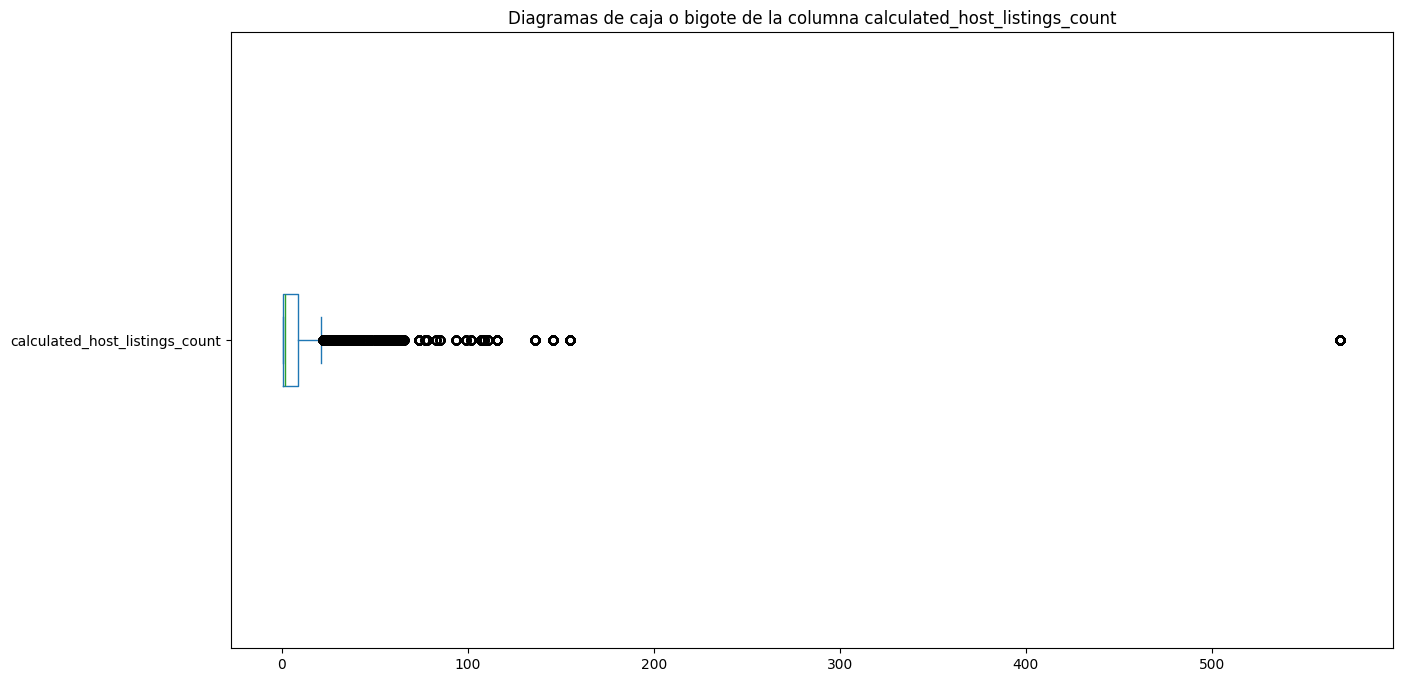

In [161]:
plt.figure(figsize=(15, 8))
cuantitativas['calculated_host_listings_count'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna calculated_host_listings_count')
plt.show()

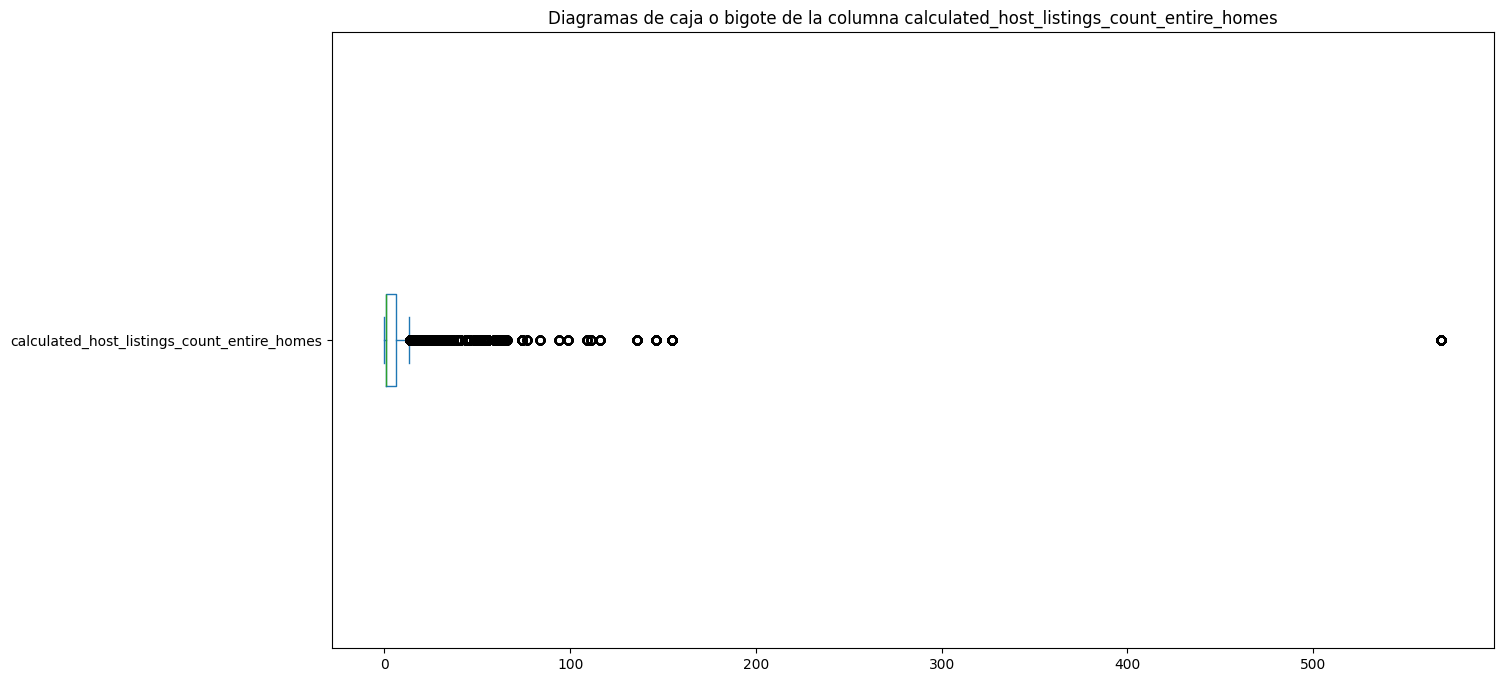

In [162]:
plt.figure(figsize=(15, 8))
cuantitativas['calculated_host_listings_count_entire_homes'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna calculated_host_listings_count_entire_homes')
plt.show()

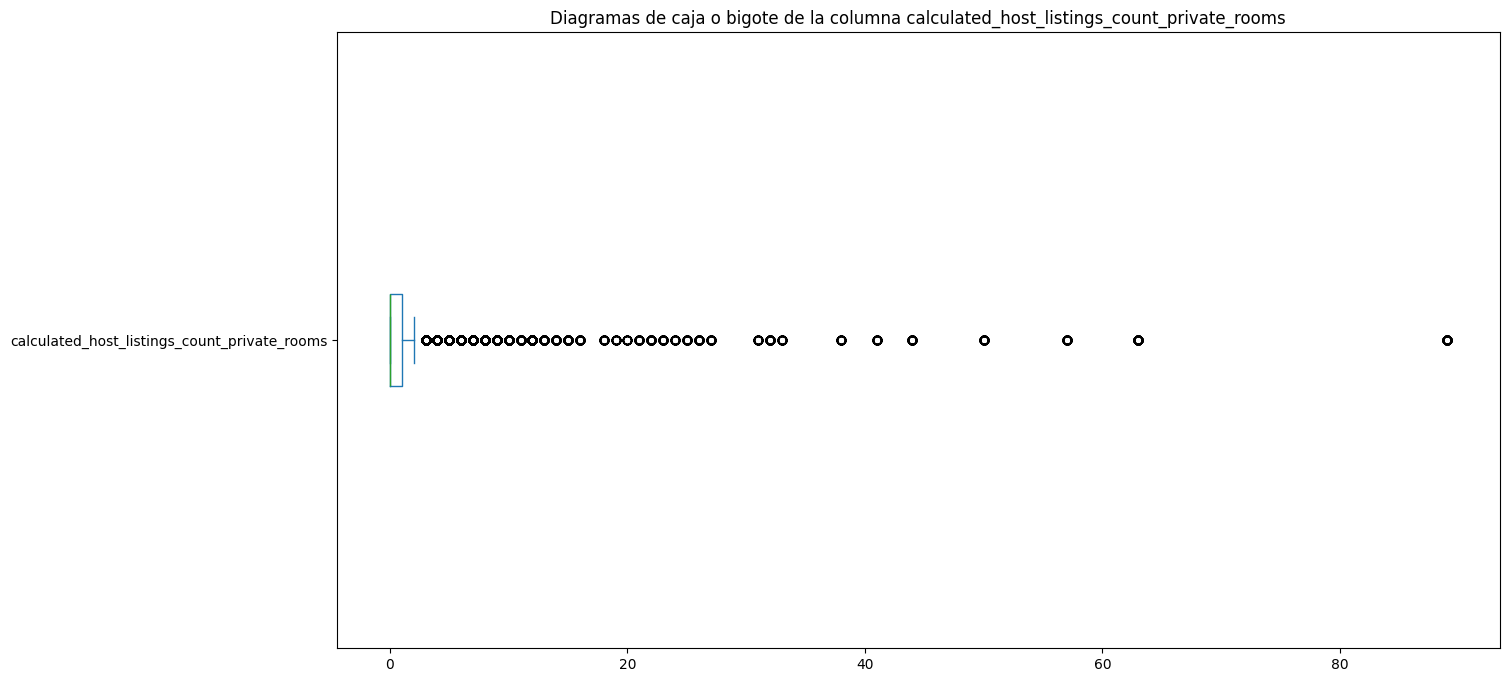

In [163]:
plt.figure(figsize=(15, 8))
cuantitativas['calculated_host_listings_count_private_rooms'].plot(kind='box', vert=False)
plt.title('Diagramas de caja o bigote de la columna calculated_host_listings_count_private_rooms')
plt.show()

# **Rango interculatico**


In [164]:
# Metodo aplicando cuantiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas

percentiles25  = y.quantile(0.25)
percentiles75 = y.quantile(0.75)
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr

print("Limite superior permitido")
print(Limite_Superior_iqr)
print("Limite inferior permitido")
print(Limite_Inferior_iqr)

Limite superior permitido
host_response_rate                                 1.000000
host_acceptance_rate                               1.165000
host_listings_count                               28.500000
host_total_listings_count                         42.000000
latitude                                          34.272515
longitude                                       -117.964707
accommodates                                      12.000000
bedrooms                                           3.500000
beds                                               6.000000
price                                            407.500000
minimum_nights                                    72.000000
maximum_nights                                  2677.500000
availability_30                                   72.500000
availability_60                                  140.500000
availability_90                                  197.500000
availability_365                                 725.000000
number_of_revi

In [165]:
# Obtenemos datos limpios del DataFrame
Datos_sin_Outliers_iqr = cuantitativas[(y <= Limite_Superior_iqr) & (y >= Limite_Inferior_iqr)]
Datos_sin_Outliers_iqr

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,NaN,NaN,NaN,NaN,34.049660,-118.435550,6.0,3.0,3.0,399.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,NaN,4.0,NaN
1,1.0,1.00,1.0,1.0,34.048410,-118.387510,2.0,2.0,3.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
2,NaN,NaN,4.0,5.0,34.070583,-118.390742,6.0,3.0,3.0,NaN,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,4.0,4.0,0.0
3,NaN,NaN,15.0,25.0,34.109329,-118.073098,2.0,1.0,1.0,49.0,...,NaN,5.00,5.00,5.00,5.00,5.00,NaN,4.0,1.0,NaN
4,1.0,0.95,3.0,5.0,34.015590,-118.494080,2.0,0.0,1.0,231.0,...,4.93,4.95,4.98,4.93,5.00,4.73,4.77,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,1.0,1.00,1.0,1.0,33.976649,-118.457536,2.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45529,1.0,1.00,1.0,1.0,34.049102,-118.247411,3.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45530,1.0,1.00,3.0,3.0,NaN,-118.171780,5.0,2.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,3.0,0.0,NaN
45531,1.0,1.00,2.0,5.0,34.027010,-118.326880,2.0,0.0,1.0,116.0,...,4.84,4.91,4.73,4.92,4.94,4.78,4.75,1.0,1.0,0.0


In [166]:
# contar nulos por columnas
Datos_sin_Outliers_iqr.isnull().sum()

,0
host_response_rate,7864
host_acceptance_rate,5712
host_listings_count,7032
host_total_listings_count,7002
latitude,4280
longitude,2744
accommodates,745
bedrooms,4748
beds,1084
price,4740


In [167]:
# Remplazamos valores atipicos del dataframe con mean
df_clean_iqr = Datos_sin_Outliers_iqr.copy()
df_clean_iqr = df_clean_iqr.fillna(round(Datos_sin_Outliers_iqr.mean(),1))
df_clean_iqr

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,1.0,1.00,4.7,7.2,34.049660,-118.435550,6.0,3.0,3.0,399.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,3.9,4.0,0.2
1,1.0,1.00,1.0,1.0,34.048410,-118.387510,2.0,2.0,3.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
2,1.0,1.00,4.0,5.0,34.070583,-118.390742,6.0,3.0,3.0,157.2,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,4.0,4.0,0.0
3,1.0,1.00,15.0,25.0,34.109329,-118.073098,2.0,1.0,1.0,49.0,...,4.90,5.00,5.00,5.00,5.00,5.00,4.80,4.0,1.0,0.2
4,1.0,0.95,3.0,5.0,34.015590,-118.494080,2.0,0.0,1.0,231.0,...,4.93,4.95,4.98,4.93,5.00,4.73,4.77,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,1.0,1.00,1.0,1.0,33.976649,-118.457536,2.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45529,1.0,1.00,1.0,1.0,34.049102,-118.247411,3.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45530,1.0,1.00,3.0,3.0,34.100000,-118.171780,5.0,2.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,3.0,0.0,0.2
45531,1.0,1.00,2.0,5.0,34.027010,-118.326880,2.0,0.0,1.0,116.0,...,4.84,4.91,4.73,4.92,4.94,4.78,4.75,1.0,1.0,0.0


In [168]:
# contar nulos por columnas
df_clean_iqr.isnull().sum()

,0
host_response_rate,0
host_acceptance_rate,0
host_listings_count,0
host_total_listings_count,0
latitude,0
longitude,0
accommodates,0
bedrooms,0
beds,0
price,0


# **Desviacion estandar**

In [169]:
# Metodo aplicando desviacion estandar, Encuentro los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superiror para desviacion estandar: ")
print(Limite_Superior)
print("Limite inferior para desviacion estandar: ")
print(Limite_Inferior)

Limite superiror para desviacion estandar: 
host_response_rate                                 1.413070
host_acceptance_rate                               1.511864
host_listings_count                             1817.435411
host_total_listings_count                       2184.331290
latitude                                          34.479490
longitude                                       -117.796114
accommodates                                      12.604706
bedrooms                                           5.782579
beds                                               7.622627
price                                           2213.561456
minimum_nights                                   104.366824
maximum_nights                                  1714.003022
availability_30                                   51.591460
availability_60                                  105.016191
availability_90                                  159.423736
availability_365                                 595.276

In [170]:
# Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
Datos_sin_Outliers

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,0.96,0.41,173.0,194.0,34.049660,-118.435550,6.0,3.0,3.0,399.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,61.0,4.0,NaN
1,1.00,1.00,1.0,1.0,34.048410,-118.387510,2.0,2.0,3.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
2,0.60,NaN,4.0,5.0,34.070583,-118.390742,6.0,3.0,3.0,434.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,4.0,4.0,0.0
3,NaN,0.56,15.0,25.0,34.109329,-118.073098,2.0,1.0,1.0,49.0,...,NaN,5.00,5.00,5.00,5.00,5.00,NaN,4.0,1.0,3.0
4,1.00,0.95,3.0,5.0,34.015590,-118.494080,2.0,0.0,1.0,231.0,...,4.93,4.95,4.98,4.93,5.00,4.73,4.77,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,1.00,1.00,1.0,1.0,33.976649,-118.457536,2.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45529,1.00,1.00,1.0,1.0,34.049102,-118.247411,3.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45530,1.00,1.00,3.0,3.0,33.788520,-118.171780,5.0,2.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,3.0,0.0,3.0
45531,1.00,1.00,2.0,5.0,34.027010,-118.326880,2.0,0.0,1.0,116.0,...,4.84,4.91,4.73,4.92,4.94,4.78,4.75,1.0,1.0,0.0


In [171]:
# contar nulos por columnas
Datos_sin_Outliers.isnull().sum()

,0
host_response_rate,1324
host_acceptance_rate,1475
host_listings_count,830
host_total_listings_count,898
latitude,1000
longitude,444
accommodates,745
bedrooms,652
beds,617
price,452


In [172]:
# Rellenamos los valores atipicos con la media
df_clean = Datos_sin_Outliers.copy()
df_clean = df_clean.fillna(round(Datos_sin_Outliers.mean(),1))
df_clean

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,0.96,0.41,173.0,194.0,34.049660,-118.435550,6.0,3.0,3.0,399.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,61.0,4.0,1.0
1,1.00,1.00,1.0,1.0,34.048410,-118.387510,2.0,2.0,3.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
2,0.60,0.90,4.0,5.0,34.070583,-118.390742,6.0,3.0,3.0,434.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,4.0,4.0,0.0
3,1.00,0.56,15.0,25.0,34.109329,-118.073098,2.0,1.0,1.0,49.0,...,4.80,5.00,5.00,5.00,5.00,5.00,4.70,4.0,1.0,3.0
4,1.00,0.95,3.0,5.0,34.015590,-118.494080,2.0,0.0,1.0,231.0,...,4.93,4.95,4.98,4.93,5.00,4.73,4.77,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45528,1.00,1.00,1.0,1.0,33.976649,-118.457536,2.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45529,1.00,1.00,1.0,1.0,34.049102,-118.247411,3.0,1.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,1.0,1.0,0.0
45530,1.00,1.00,3.0,3.0,33.788520,-118.171780,5.0,2.0,1.0,155.0,...,4.80,4.80,4.70,4.90,4.90,4.80,4.70,3.0,0.0,3.0
45531,1.00,1.00,2.0,5.0,34.027010,-118.326880,2.0,0.0,1.0,116.0,...,4.84,4.91,4.73,4.92,4.94,4.78,4.75,1.0,1.0,0.0


In [173]:
# contar nulos por columnas
df_clean.isnull().sum() #Metodo de desviacion estandar le cuesta detectar

,0
host_response_rate,0
host_acceptance_rate,0
host_listings_count,0
host_total_listings_count,0
latitude,0
longitude,0
accommodates,0
bedrooms,0
beds,0
price,0
